# Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score,f1_score, precision_score, recall_score,confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout, Dense
import tensorflow as tf


# Load Dataset

In [2]:
# Define the mapping of column indexes to feature names
feature_mapping = {
    1: 'Pregnancies', 
    2: 'Glucose', 
    3: 'BloodPressure', 
    4: 'SkinThickness', 
    5: 'Insulin', 
    6: 'BMI', 
    7: 'DiabetesPedigreeFunction', 
    8: 'Age'
}

# Custom function to parse each row of eigenvalue pairs
def parse_line(line):
    items = line.split()
    row_dict = {}
    # Converted to 0 and 1 in the first column
    row_dict['Outcome'] = 1 if int(items[0]) == 1 else 0  
    for item in items[1:]:
        if ":" in item:
            feature, value = item.split(":")
            row_dict[feature_mapping[int(feature)]] = float(value)
    return row_dict

# Open the file and parse it line by line
file_path = r'C:\Users\12082\Desktop\Deep Learning\diabetes_scale.txt'
with open(file_path, 'r') as f:
    lines = f.readlines()

# Use custom parsing functions to process each line
data = [parse_line(line) for line in lines]

# Convert parsed data into a DataFrame
df = pd.DataFrame(data)




# Statistical information

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Outcome                   768 non-null    int64  
 1   Pregnancies               768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             767 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       760 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB
None


In [4]:
print(df.describe())

          Outcome  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     767.000000     768.000000   
mean     0.651042    -0.547641    0.215020       0.133050      -0.585122   
std      0.476951     0.396421    0.321333       0.317479       0.322267   
min      0.000000    -1.000000   -1.000000      -1.000000      -1.000000   
25%      0.000000    -0.882353   -0.005025       0.032787      -1.000000   
50%      1.000000    -0.647059    0.175879       0.180328      -0.535354   
75%      1.000000    -0.294118    0.409547       0.311475      -0.353535   
max      1.000000     1.000000    1.000000       1.000000       1.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  760.000000  
mean    -0.811349   -0.046421                 -0.663641   -0.598202  
std      0.272444    0.234997                  0.282945    0.389304  
min     -1.000000   -1.000000      

In [5]:
print(df.shape)

(768, 9)


In [6]:
print(df.dtypes)

Outcome                       int64
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
dtype: object


In [7]:
print(df.head())

   Outcome  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0        0    -0.294118  0.487437       0.180328      -0.292929 -1.000000   
1        1    -0.882353 -0.145729       0.081967      -0.414141 -1.000000   
2        0    -0.058824  0.839196       0.049180      -1.000000 -1.000000   
3        1    -0.882353 -0.105528       0.081967      -0.535354 -0.777778   
4        0    -1.000000  0.376884      -0.344262      -0.292929 -0.602837   

        BMI  DiabetesPedigreeFunction       Age  
0  0.001490                 -0.531170 -0.033333  
1 -0.207153                 -0.766866 -0.666667  
2 -0.305514                 -0.492741 -0.633333  
3 -0.162444                 -0.923997 -1.000000  
4  0.284650                  0.887276 -0.600000  


In [8]:
print(df.tail())

     Outcome  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
763        1     0.176471  0.015075       0.245902      -0.030303 -0.574468   
764        1    -0.764706  0.226131       0.147541      -0.454545 -1.000000   
765        1    -0.411765  0.216080       0.180328      -0.535354 -0.735225   
766        0    -0.882353  0.266332      -0.016393      -1.000000 -1.000000   
767        1    -0.882353 -0.065327       0.147541      -0.373737 -1.000000   

          BMI  DiabetesPedigreeFunction       Age  
763 -0.019374                 -0.920581  0.400000  
764  0.096870                 -0.776260 -0.800000  
765 -0.219076                 -0.857387 -0.700000  
766 -0.102832                 -0.768574 -0.133333  
767 -0.093890                 -0.797609 -0.933333  


In [9]:
print(df.isnull().sum())

Outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               1
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         8
dtype: int64


# Filling in missing data

In [10]:
# Use the median of each column to fill in missing values
df.fillna(df.median(), inplace=True)

# Checking for missing data
print(df.isnull().sum())

Outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


# Data visualization

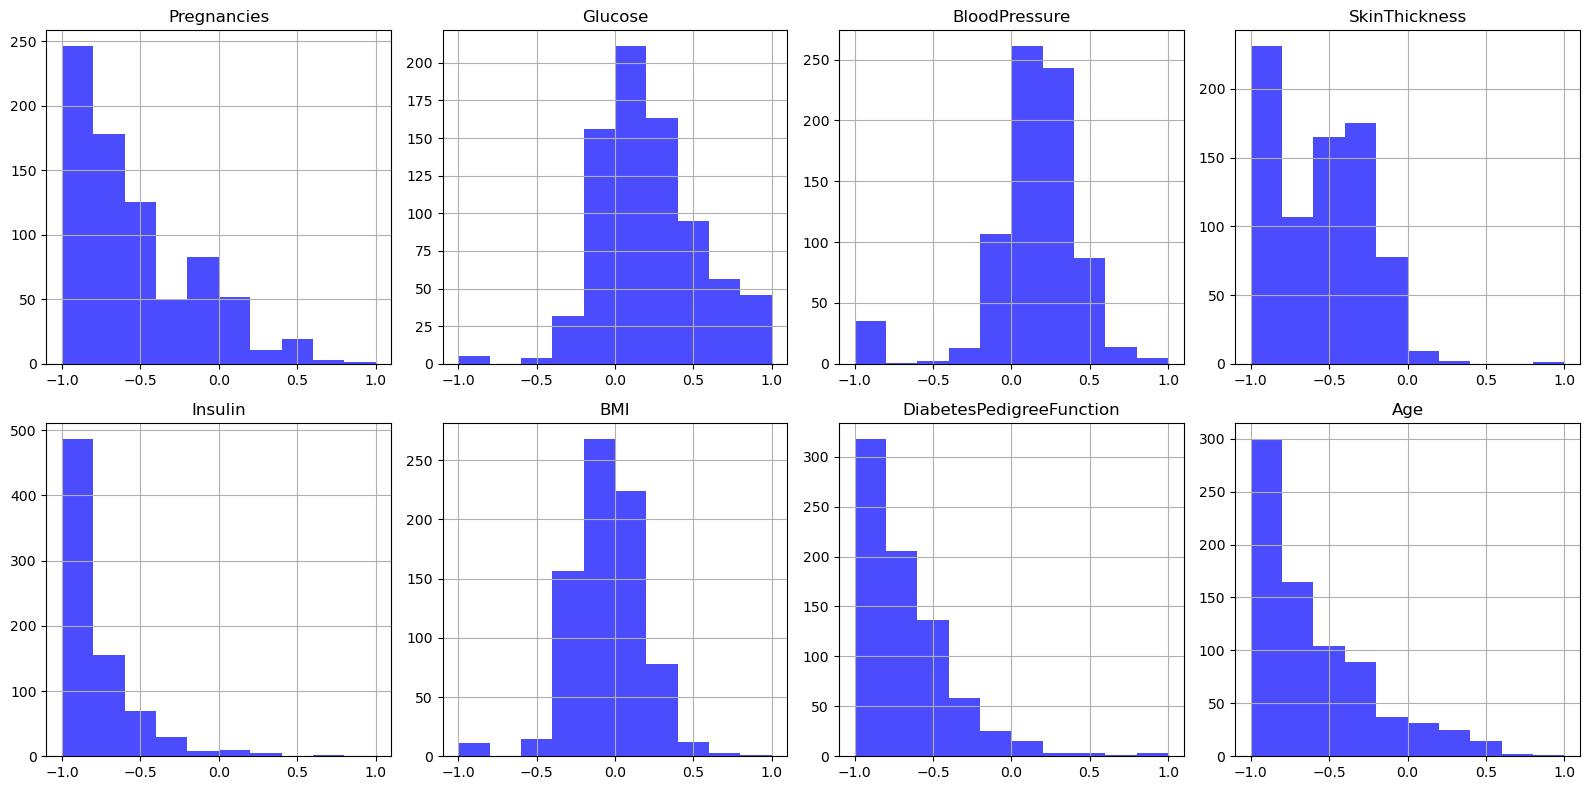

In [11]:
# Define the name of the feature to be drawn
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create subgraphs, 2 rows and 4 columns, 8 subgraphs in total
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Iterate over each feature and plot the histogram on the corresponding subplot
for i, feature in enumerate(features):
    row = i // 4 
    col = i % 4 
    axs[row, col].hist(df[feature], color='blue', alpha=0.7)
    axs[row, col].set_title(feature)
    axs[row, col].grid(True)

# Adjust the layout to avoid overlapping subgraphs
plt.tight_layout()
plt.show()


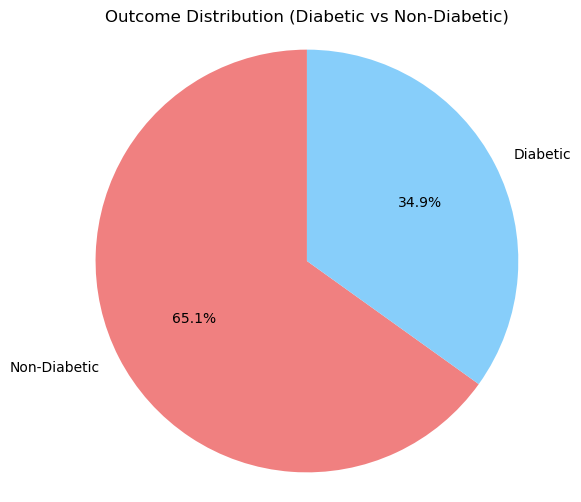

In [12]:
# Count the number of 0 and 1 in the Outcome column.
outcome_counts = df['Outcome'].value_counts()

# Replace 1 and 0 with 'Non-Diabetic' and 'Diabetic'.
label_mapping = {1: 'Non-Diabetic', 0: 'Diabetic'}
outcome_labels = outcome_counts.index.map(label_mapping)

# Drawing pie charts
plt.figure(figsize=(6,6))
plt.pie(outcome_counts, labels=outcome_labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Outcome Distribution (Diabetic vs Non-Diabetic)')
plt.axis('equal')
plt.show()


# Split data sets

In [13]:
# Separate features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Examination of the results of the division
print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")



Train set: (614, 8)
Test set: (154, 8)


# Building a multilayer perceptron

In [14]:
# Define a multilayer perceptron model
model = Sequential()

# Modify layers in the model to include L2 regularization
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Training model
history = model.fit(X_train, y_train, epochs=60, batch_size=64, validation_split=0.2)


Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6097 - loss: 1.8058 - val_accuracy: 0.5854 - val_loss: 1.6771
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6838 - loss: 1.6041 - val_accuracy: 0.5854 - val_loss: 1.5408
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - loss: 1.4589 - val_accuracy: 0.5854 - val_loss: 1.4085
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6948 - loss: 1.3146 - val_accuracy: 0.5854 - val_loss: 1.2841
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6679 - loss: 1.2215 - val_accuracy: 0.6098 - val_loss: 1.1776
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7046 - loss: 1.1109 - val_accuracy: 0.6341 - val_loss: 1.0883
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7245 - loss: 1.0162 - val_accuracy: 0.6423 - val_loss: 1.0168
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7103 - loss: 0.9707 - val_accuracy: 0.6992 - val_loss: 0.9431
Epoch 9

# Loss and accuracy

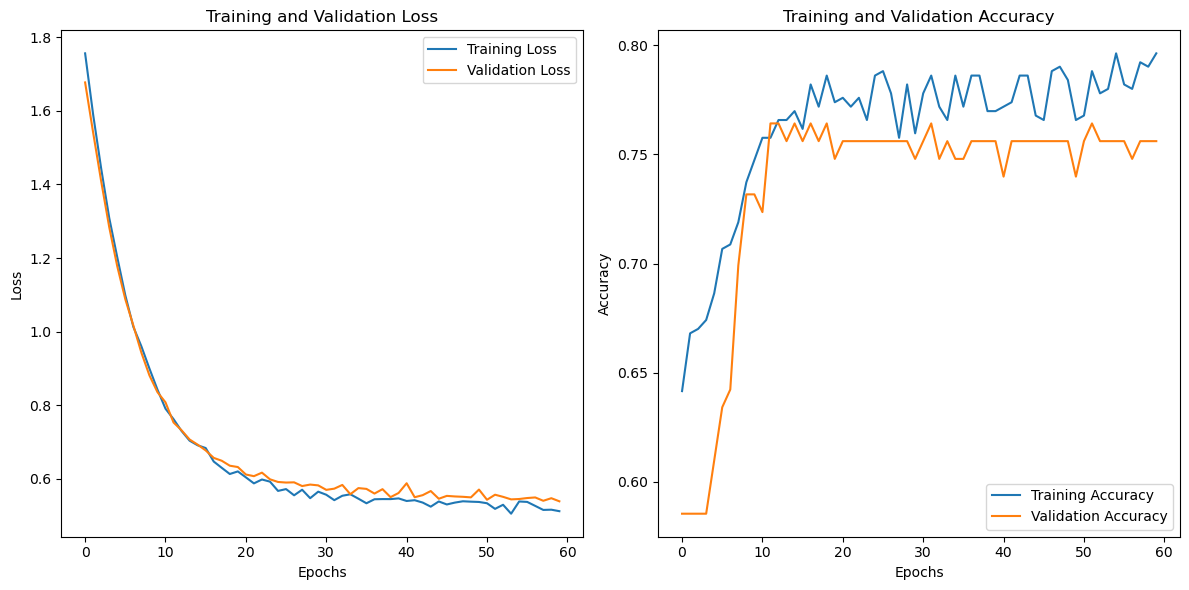

In [15]:
# Plotting the loss and accuracy changes in the training and validation sets
plt.figure(figsize=(12, 6))

# Plot the losses
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



# Generate Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Confusion Matrix:
 [[31 23]
 [12 88]]


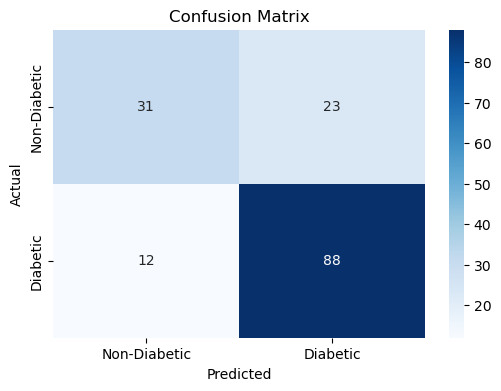

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.57      0.64        54
           1       0.79      0.88      0.83       100

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154

Accuracy: 0.7727272727272727
F1-Score: 0.8341232227488151
Precision: 0.7927927927927928
Recall: 0.88


In [16]:
# Predicted outcomes are probability values
y_pred_prob = model.predict(X_test)

# Convert probability values to binary labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visual Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate accuracy, F1-Score, precision and recall
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(f"F1-Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# ROC and AUC

AUC: 0.8435


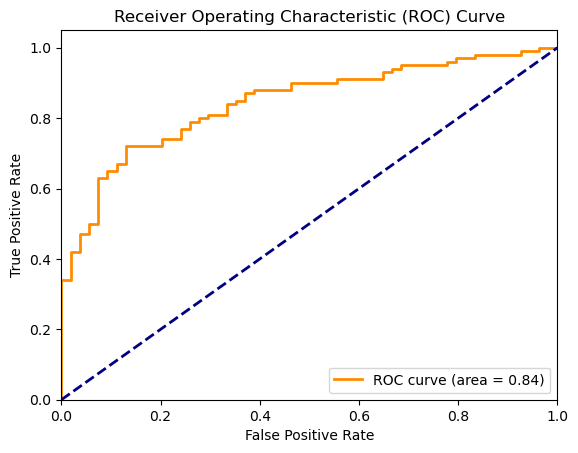

In [18]:
# Calculate FPR (False Positive Rate) and TPR (True Positive Rate)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

# Plotting ROC curves
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
